读入tips.csv 数据集

1. 统计不同time的tip的均值，方差

2. 将total_bill和tip根据不同的sex进行标准化(原数据减去均值的结果除以标准差)

3. 计算吸烟者和非吸烟者的小费比例值均值  的差值

4. 对sex与size聚合，统计不同分组的小费比例的标准差、均值，将该标准差与均值添加到原数据中

5. 对time和size聚合，画出total_bill 的饼图

In [1]:
from __future__ import division
from numpy.random import randn
import numpy as np
import os
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
import pandas as pd
import matplotlib as mpl
import matplotlib.dates as mdates
from mpl_toolkits.mplot3d import Axes3D
import numpy as np


In [2]:
import pathlib as PL
home = PL.Path(get_ipython().magic(u'pwd'))
tips = pd.read_csv(home/'data/tips.csv')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# 1.统计不同time的tip的均值，方差

In [3]:
tips.groupby('time').describe()

size                                                 tip            \
        count      mean       std  min  25%  50%  75%  max  count      mean   
time                                                                          
Dinner  176.0  2.630682  0.910241  1.0  2.0  2.0  3.0  6.0  176.0  3.102670   
Lunch    68.0  2.411765  1.040024  1.0  2.0  2.0  2.0  6.0   68.0  2.728088   

        ...                 total_bill                                      \
        ...       75%   max      count       mean       std   min      25%   
time    ...                                                                  
Dinner  ...    3.6875  10.0      176.0  20.797159  9.142029  3.07  14.4375   
Lunch   ...    3.2875   6.7       68.0  17.168676  7.713882  7.51  12.2350   

                                
           50%      75%    max  
time                            
Dinner  18.390  25.2825  50.81  
Lunch   15.965  19.5325  43.11  

[2 rows x 24 columns]

In [4]:
# or
tips.groupby('time').agg(['mean', 'std'])

total_bill                 tip                size          
             mean       std      mean       std      mean       std
time                                                               
Dinner  20.797159  9.142029  3.102670  1.436243  2.630682  0.910241
Lunch   17.168676  7.713882  2.728088  1.205345  2.411765  1.040024

# 2.将total_bill和tip根据不同的sex进行标准化
(原数据减去均值的结果除以标准差)

In [5]:
t = tips.groupby('sex').agg(['mean', 'std'])
t 

total_bill                 tip                size          
             mean       std      mean       std      mean       std
sex                                                                
Female  18.056897  8.009209  2.833448  1.159495  2.459770  0.937644
Male    20.744076  9.246469  3.089618  1.489102  2.630573  0.955997

In [6]:
tb_m_F = t['total_bill']['mean'].Female
tb_m_M= t['total_bill']['mean'].Male
tb_std_F= t['total_bill']['std'].Female
tb_std_M= t['total_bill']['std'].Male

t_m_F = t['tip']['mean'].Female
t_m_M= t['tip']['mean'].Male
t_std_F= t['tip']['std'].Female
t_std_M= t['tip']['std'].Male



In [7]:
tips['standard_total_bill'] = tips['total_bill'] / 1
tips['standard_tip'] = tips['tip'] / 1


In [8]:
for i in range(len(tips["total_bill"])):
    if tips['sex'][i] == "Male":
        tips["standard_total_bill"][i] = (tips["total_bill"][i] - tb_m_M) / tb_std_M
        tips['standard_tip'][i] = (tips['tip'][i] - t_m_M) / t_std_M
    else:
        tips["standard_total_bill"][i] = (tips["total_bill"][i] - tb_m_F) / tb_std_F
        tips['standard_tip'][i] = (tips['tip'][i] - t_m_F) / t_std_F

tips.head()

d:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
d:\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
d:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
d:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is 

,total_bill,tip,sex,smoker,day,time,size,standard_total_bill,standard_tip
0,16.99,1.01,Female,No,Sun,Dinner,2,-0.133209,-1.572623
1,10.34,1.66,Male,No,Sun,Dinner,3,-1.125195,-0.960054
2,21.01,3.50,Male,No,Sun,Dinner,3,0.028759,0.275590
3,23.68,3.31,Male,No,Sun,Dinner,2,0.317518,0.147997
4,24.59,3.61,Female,No,Sun,Dinner,4,0.815699,0.669733


# 3.计算吸烟者和非吸烟者的小费比例值均值 的差值

理解一：先求吸烟与不吸烟人群的小费平均值，再求吸烟与不吸烟人群的账单值，最后再求百分比差值。

In [9]:
t = tips.groupby('smoker')
tb = t['total_bill']
tt = t['tip']

no = (tt.mean().No / tb.mean().No )* 100
yes = (tt.mean().Yes / tb.mean().Yes )* 100

In [10]:
print("不吸烟人群中，小费均值与账单均值的百分比：",str(no),"%")
print("吸烟人群中，小费均值与账单均值的百分比：",str(yes),"%")
print("不吸烟与吸烟的消费比例均值的差值：",str(no - yes),"%")

不吸烟人群中，小费均值与账单均值的百分比： 15.59209368302254 %
吸烟人群中，小费均值与账单均值的百分比： 14.495373871960378 %
不吸烟与吸烟的消费比例均值的差值： 1.0967198110621617 %


理解二：求每一行的tip/total_bill的比例值均值，再求差

In [11]:
tips['tip_pct'] = tips['tip'] / tips['total_bill']
tips[:6]

grouped = tips.groupby(['smoker'])

grouped_pct = grouped['tip_pct']
g = grouped_pct.agg('mean')

In [12]:
print("不吸烟人群中，小费均值与账单均值的百分比：",str(g.No*100),"%")
print("吸烟人群中，小费均值与账单均值的百分比：",str(g.Yes*100),"%")
print("不吸烟与吸烟的消费比例均值的差值：",str((g.No - g.Yes)*100),"%")

不吸烟人群中，小费均值与账单均值的百分比： 15.932846217921531 %
吸烟人群中，小费均值与账单均值的百分比： 16.31960446368779 %
不吸烟与吸烟的消费比例均值的差值： -0.3867582457662583 %


# 4.对sex与size聚合，统计不同分组的小费比例的标准差、均值，将该标准差与均值添加到原数据中

In [13]:
t = tips.groupby(['sex', 'size'])

fun = ['std', 'mean']
new_cols = t['tip'].agg(fun)
# new_cols = new_cols.unstack(-2)
new_cols
tips.head()
type(tips["size"][0])

numpy.int64

In [14]:
a = list()
b = list(range(1,7)) * 2
# for i in range(0,12):
#     s = b[i]
#     a.append(str(s))
    
# a

In [15]:
new = DataFrame({
    "size": b,
    "sex": list(["Female"]) * 6 + list(["Male"]) *6,
    "std": np.array(new_cols['std']),
    "mean": np.array(new_cols['mean'])},
    columns = ["sex","size","mean","std"]
)

new

,sex,size,mean,std
0,Female,1,1.276667,0.479201
1,Female,2,2.528448,0.882510
2,Female,3,3.250000,1.291398
3,Female,4,4.021111,1.084924
4,Female,5,5.140000,NaN
5,Female,6,4.600000,0.565685
6,Male,1,1.920000,NaN
7,Male,2,2.614184,1.044757
8,Male,3,3.476667,1.714419
9,Male,4,4.172143,1.798484


In [16]:
#pd.concat([tips,new],axis=1,keys= [("sex","size")])

In [17]:
pd.merge(tips,new,on = ["size","sex"])

,total_bill,tip,sex,smoker,day,time,size,standard_total_bill,standard_tip,tip_pct,mean,std
0,16.99,1.01,Female,No,Sun,Dinner,2,-0.133209,-1.572623,0.059447,2.528448,0.882510
1,14.83,3.02,Female,No,Sun,Dinner,2,-0.402898,0.160891,0.203641,2.528448,0.882510
2,20.29,2.75,Female,No,Sat,Dinner,2,0.278817,-0.071970,0.135535,2.528448,0.882510
3,15.77,2.23,Female,No,Sat,Dinner,2,-0.285533,-0.520441,0.141408,2.528448,0.882510
4,19.65,3.00,Female,No,Sat,Dinner,2,0.198909,0.143642,0.152672,2.528448,0.882510
5,15.06,3.00,Female,No,Sat,Dinner,2,-0.374181,0.143642,0.199203,2.528448,0.882510
6,10.29,2.60,Female,No,Sun,Dinner,2,-0.969746,-0.201336,0.252672,2.528448,0.882510
7,26.41,1.50,Female,No,Sat,Dinner,2,1.042937,-1.150026,0.056797,2.528448,0.882510
8,16.45,2.47,Female,No,Sat,Dinner,2,-0.200631,-0.313454,0.150152,2.528448,0.882510
9,26.86,3.14,Female,Yes,Sat,Dinner,2,1.099123,0.264384,0.116902,2.528448,0.882510


# 5.对time和size聚合，画出total_bill 的饼图

In [18]:
tb = tips.groupby(["time","size"])
tbc = tb.count()["total_bill"]
tbc

time    size
Dinner  1         2
        2       104
        3        33
        4        32
        5         4
        6         1
Lunch   1         2
        2        52
        3         5
        4         5
        5         1
        6         3
Name: total_bill, dtype: int64

In [19]:
values = list(tb.count()["total_bill"])
print(values)
sum(values)

[2, 104, 33, 32, 4, 1, 2, 52, 5, 5, 1, 3]


244

In [22]:
values = list(tbc/sum(values))
values

[2.0000000000000004,
 104.00000000000001,
 33.00000000000001,
 32.00000000000001,
 4.000000000000001,
 1.0000000000000002,
 2.0000000000000004,
 52.00000000000001,
 5.000000000000001,
 5.000000000000001,
 1.0000000000000002,
 3.0000000000000004]

In [23]:
a = list()
b = list(range(1,7)) * 2
for i in range(0,12):
    s = b[i]
    a.append(str(s))
    
a[11]


'6'

In [24]:
labels = list()
for i in range(0,12):
    labels.append("Size "+str(a[i]))
    
labels

['Size 1',
 'Size 2',
 'Size 3',
 'Size 4',
 'Size 5',
 'Size 6',
 'Size 1',
 'Size 2',
 'Size 3',
 'Size 4',
 'Size 5',
 'Size 6']

In [25]:
# 用time做颜色区分，size做label，total_bill做segment
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

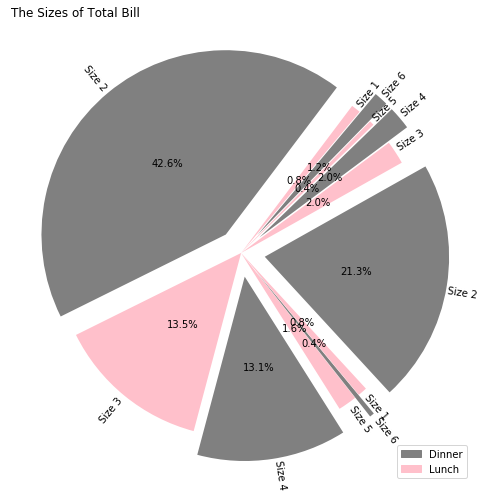

In [26]:
plt.figure(1, figsize=(8, 8))
ax = plt.axes([0.1, 0.1, 0.8, 0.8])
explode = list([0,0.13]*6)
values=list(tbc/sum(explode))

plt.pie(values,explode = explode,labels = labels,autopct='%1.1f%%',startangle=50,colors=["pink","grey"],pctdistance = 0.5,radius = 1,labeldistance=1,rotatelabels=0.5)
plt.title('The Sizes of Total Bill',loc = "left")

patch = mpatches.Patch(color='grey', label='Dinner')
patch2 = mpatches.Patch(color='pink', label='Lunch')
plt.legend(handles=[patch,patch2],loc = "lower right")
plt.show()


`pie函数参数解读 plt.pie(x, explode= None, labels= None, colors= None, autopct= None, pctdistance= 0.6, shadow= False, labeldistance= 1.1, startangle= None, radius= None, counterclock= True, wedgeprops= None, textprops= None, center=( 0, 0), frame= False)`


x：指定绘图的数据；

explode：指定饼图某些部分的突出显示，即呈现爆炸式；

labels：为饼图添加标签说明，类似于图例说明；

colors：指定饼图的填充色；

autopct：自动添加百分比显示，可以采用格式化的方法显示；

pctdistance：设置百分比标签与圆心的距离；

shadow：是否添加饼图的阴影效果；

labeldistance：设置各扇形标签（图例）与圆心的距离；

startangle：设置饼图的初始摆放角度；

radius：设置饼图的半径大小；

counterclock：是否让饼图按逆时针顺序呈现；

wedgeprops：设置饼图内外边界的属性，如边界线的粗细、颜色等；

textprops：设置饼图中文本的属性，如字体大小、颜色等；

center：指定饼图的中心点位置，默认为原点

frame：是否要显示饼图背后的图框，如果设置为True的话，需要同时控制图框x轴、y轴的范围和饼图的中心位置；